In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [ ]:
financial = pd.read_csv('/content/financial_management_dataset.csv')
financial.head()

,revenue,expenditure,funding_stability,operational_costs,transparency_score,risk_tolerance,fund_utilization_efficiency,predicted_trend,anomaly_label
0,54967141.53,27829731.98,0.536,22843223.08,7.20,0.406,0.648,17814588.01,0
1,48617356.99,37256534.90,0.448,21914608.55,4.42,0.606,0.917,11827892.14,0
2,56476885.38,41277550.20,0.519,28132153.67,6.55,0.439,0.583,16021021.36,0
3,65230298.56,61989188.92,0.425,21180215.32,3.40,0.934,0.527,11193056.35,0
4,47658466.25,50008978.12,0.931,18069886.01,3.23,0.535,0.596,7914467.10,0


## Financial Performance Analysis

In [ ]:
financial['Net_Income'] = financial['revenue'] - financial['expenditure']
financial['Operating_Margin'] = financial['Net_Income'] / financial['revenue']
financial['Cost_to_Revenue_Ratio'] = financial['expenditure'] / financial['revenue']
financial['Operational_Cost_Efficiency'] = financial['revenue'] / financial['operational_costs']
financial.head()

,revenue,expenditure,funding_stability,operational_costs,transparency_score,risk_tolerance,fund_utilization_efficiency,predicted_trend,anomaly_label,Net_Income,Operating_Margin,Cost_to_Revenue_Ratio,Operational_Cost_Efficiency
0,54967141.53,27829731.98,0.536,22843223.08,7.20,0.406,0.648,17814588.01,0,27137409.55,0.493702,0.506298,2.406278
1,48617356.99,37256534.90,0.448,21914608.55,4.42,0.606,0.917,11827892.14,0,11360822.09,0.233678,0.766322,2.218491
2,56476885.38,41277550.20,0.519,28132153.67,6.55,0.439,0.583,16021021.36,0,15199335.18,0.269125,0.730875,2.007556
3,65230298.56,61989188.92,0.425,21180215.32,3.40,0.934,0.527,11193056.35,0,3241109.64,0.049687,0.950313,3.079775
4,47658466.25,50008978.12,0.931,18069886.01,3.23,0.535,0.596,7914467.10,0,-2350511.87,-0.049320,1.049320,2.637453


In [ ]:
financial_cleaned = financial.drop(columns=['revenue', 'expenditure', 'operational_costs'])
display(financial_cleaned.head())

,funding_stability,transparency_score,risk_tolerance,fund_utilization_efficiency,predicted_trend,anomaly_label,Net_Income,Operating_Margin,Cost_to_Revenue_Ratio,Operational_Cost_Efficiency
0,0.536,7.20,0.406,0.648,17814588.01,0,27137409.55,0.493702,0.506298,2.406278
1,0.448,4.42,0.606,0.917,11827892.14,0,11360822.09,0.233678,0.766322,2.218491
2,0.519,6.55,0.439,0.583,16021021.36,0,15199335.18,0.269125,0.730875,2.007556
3,0.425,3.40,0.934,0.527,11193056.35,0,3241109.64,0.049687,0.950313,3.079775
4,0.931,3.23,0.535,0.596,7914467.10,0,-2350511.87,-0.049320,1.049320,2.637453


In [ ]:
financial_cleaned.isnull().sum()

,0
funding_stability,0
transparency_score,0
risk_tolerance,0
fund_utilization_efficiency,0
predicted_trend,0
anomaly_label,0
Net_Income,0
Operating_Margin,0
Cost_to_Revenue_Ratio,0
Operational_Cost_Efficiency,0


In [ ]:
financial_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   funding_stability            3000 non-null   float64
 1   transparency_score           3000 non-null   float64
 2   risk_tolerance               3000 non-null   float64
 3   fund_utilization_efficiency  3000 non-null   float64
 4   predicted_trend              3000 non-null   float64
 5   anomaly_label                3000 non-null   int64  
 6   Net_Income                   3000 non-null   float64
 7   Operating_Margin             3000 non-null   float64
 8   Cost_to_Revenue_Ratio        3000 non-null   float64
 9   Operational_Cost_Efficiency  3000 non-null   float64
dtypes: float64(9), int64(1)
memory usage: 234.5 KB


In [ ]:
financial_cleaned.describe()

,funding_stability,transparency_score,risk_tolerance,fund_utilization_efficiency,predicted_trend,anomaly_label,Net_Income,Operating_Margin,Cost_to_Revenue_Ratio,Operational_Cost_Efficiency
count,3000.000000,3000.00000,3000.000000,3000.000000,3.000000e+03,3000.000000,3.000000e+03,3000.000000,3000.000000,3000.000000
mean,0.644883,5.06369,0.509347,0.756539,1.071804e+07,0.050667,5.664200e+06,0.073359,0.926641,2.757378
std,0.199003,2.86339,0.287039,0.145374,4.990590e+06,0.219353,1.347469e+07,0.286855,0.286855,2.969682
min,0.300000,0.00000,0.001000,0.500000,-1.135246e+07,0.000000,-4.568890e+07,-2.306952,0.270559,0.732498
25%,0.476750,2.59750,0.269000,0.630000,7.333045e+06,0.000000,-3.095295e+06,-0.068477,0.731349,2.057341
50%,0.644000,5.14000,0.508000,0.761000,1.070535e+07,0.000000,5.426814e+06,0.108397,0.891603,2.517105
75%,0.813000,7.53000,0.752000,0.882000,1.404246e+07,0.000000,1.455453e+07,0.268651,1.068477,3.129608
max,1.000000,10.00000,1.000000,1.000000,2.801519e+07,1.000000,4.913257e+07,0.729441,3.306952,154.537813


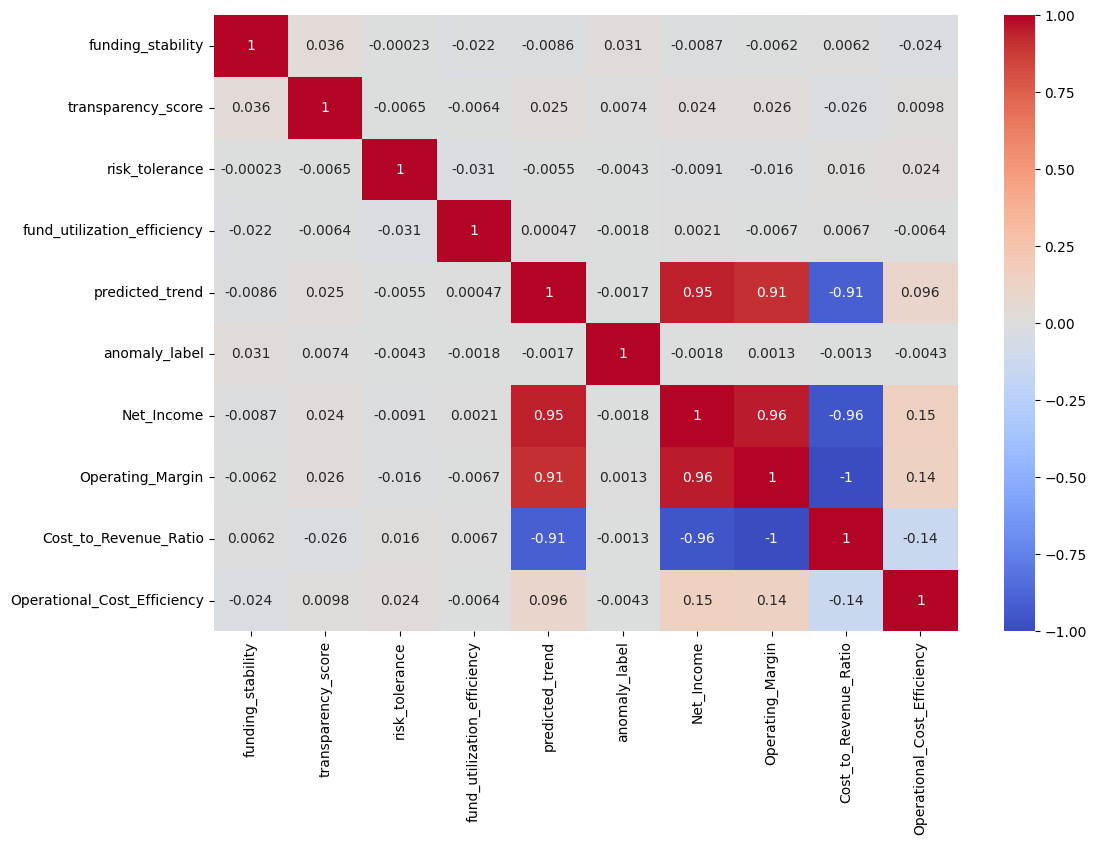

In [ ]:
financialcorr = financial_cleaned.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(financialcorr, annot=True, cmap='coolwarm')
plt.show()

## K-Means Cluster Analysis

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(financial_cleaned)
kmeans.labels_

array([2, 1, 1, ..., 4, 4, 1], dtype=int32)

In [ ]:
financial_cleaned['cluster'] = kmeans.labels_
financial_cleaned.head()

,funding_stability,transparency_score,risk_tolerance,fund_utilization_efficiency,predicted_trend,anomaly_label,Net_Income,Operating_Margin,Cost_to_Revenue_Ratio,Operational_Cost_Efficiency,cluster
0,0.536,7.20,0.406,0.648,17814588.01,0,27137409.55,0.493702,0.506298,2.406278,2
1,0.448,4.42,0.606,0.917,11827892.14,0,11360822.09,0.233678,0.766322,2.218491,1
2,0.519,6.55,0.439,0.583,16021021.36,0,15199335.18,0.269125,0.730875,2.007556,1
3,0.425,3.40,0.934,0.527,11193056.35,0,3241109.64,0.049687,0.950313,3.079775,4
4,0.931,3.23,0.535,0.596,7914467.10,0,-2350511.87,-0.049320,1.049320,2.637453,0


In [ ]:
plt.figure(figsize=(12, 8))


<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

In [ ]:
X_transparency_risk = financial_cleaned[['transparency_score', 'risk_tolerance']]

scaler_tr = MinMaxScaler()
X_transparency_risk_scaled = scaler_tr.fit_transform(X_transparency_risk)

kmeans_tr = KMeans(n_clusters=2, random_state=42, n_init=10)
financial_cleaned['transparency_risk_cluster'] = kmeans_tr.fit_predict(X_transparency_risk_scaled)

cluster_centers_original = scaler_tr.inverse_transform(kmeans_tr.cluster_centers_)

heuristic_score_0 = cluster_centers_original[0, 0] - cluster_centers_original[0, 1]
heuristic_score_1 = cluster_centers_original[1, 0] - cluster_centers_original[1, 1]

label_mapping = {
    0: 'High transparency & low risk' if heuristic_score_0 > heuristic_score_1 else 'Low transparency & high risk',
    1: 'Low transparency & high risk' if heuristic_score_0 > heuristic_score_1 else 'High transparency & low risk'
}
financial_cleaned['transparency_risk_label'] = financial_cleaned['transparency_risk_cluster'].map(label_mapping)

print("Cluster Centers (Original Scale):")
display(pd.DataFrame(cluster_centers_original, columns=['transparency_score', 'risk_tolerance'], index=['Cluster 0', 'Cluster 1']))

print("\nFirst 5 rows with new cluster labels:")
display(financial_cleaned[['transparency_score', 'risk_tolerance', 'transparency_risk_cluster', 'transparency_risk_label']].head())

Cluster Centers (Original Scale):


,transparency_score,risk_tolerance
Cluster 0,5.310501,0.262061
Cluster 1,4.817537,0.755974



First 5 rows with new cluster labels:


,transparency_score,risk_tolerance,transparency_risk_cluster,transparency_risk_label
0,7.20,0.406,0,High transparency & low risk
1,4.42,0.606,1,Low transparency & high risk
2,6.55,0.439,0,High transparency & low risk
3,3.40,0.934,1,Low transparency & high risk
4,3.23,0.535,1,Low transparency & high risk


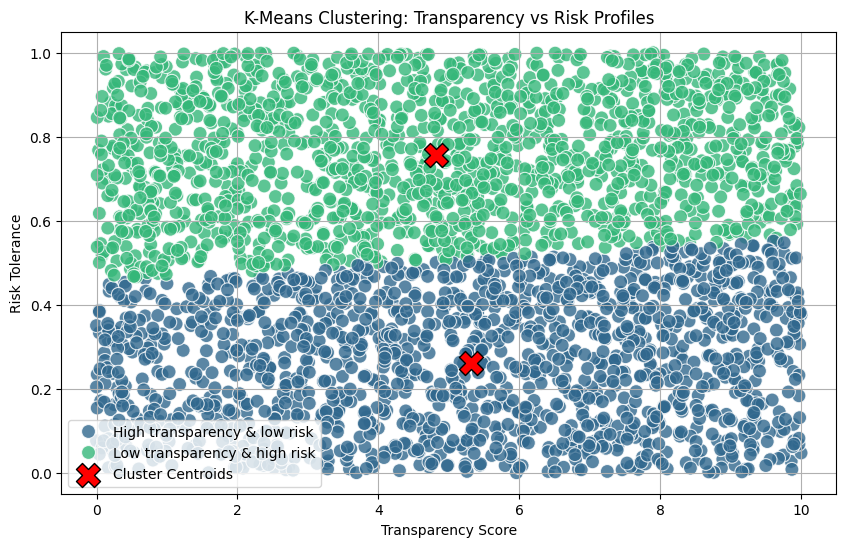

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='transparency_score',
    y='risk_tolerance',
    hue='transparency_risk_label',
    data=financial_cleaned,
    palette='viridis',
    s=100,
    alpha=0.8
)
plt.scatter(
    cluster_centers_original[:, 0],
    cluster_centers_original[:, 1],
    marker='X',
    s=300,
    color='red',
    label='Cluster Centroids',
    edgecolors='black'
)
plt.title('K-Means Clustering: Transparency vs Risk Profiles')
plt.xlabel('Transparency Score')
plt.ylabel('Risk Tolerance')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
financial_cleaned = financial_cleaned.drop(columns=['cluster','transparency_risk_cluster','transparency_risk_label'])
financial_cleaned.head()

,funding_stability,transparency_score,risk_tolerance,fund_utilization_efficiency,predicted_trend,anomaly_label,Net_Income,Operating_Margin,Cost_to_Revenue_Ratio,Operational_Cost_Efficiency
0,0.536,7.20,0.406,0.648,17814588.01,0,27137409.55,0.493702,0.506298,2.406278
1,0.448,4.42,0.606,0.917,11827892.14,0,11360822.09,0.233678,0.766322,2.218491
2,0.519,6.55,0.439,0.583,16021021.36,0,15199335.18,0.269125,0.730875,2.007556
3,0.425,3.40,0.934,0.527,11193056.35,0,3241109.64,0.049687,0.950313,3.079775
4,0.931,3.23,0.535,0.596,7914467.10,0,-2350511.87,-0.049320,1.049320,2.637453


## Linear Regression

In [ ]:
X = financial_cleaned.drop(columns=['Cost_to_Revenue_Ratio'])
y = financial_cleaned['Cost_to_Revenue_Ratio']

In [ ]:
financiallin = LinearRegression()
financiallin.fit(X, y)

LinearRegression()

In [ ]:
y_pred = financiallin.predict(X)

In [ ]:
print("Mean Squared Error:", mean_squared_error(y, y_pred))
print("R-squared:", r2_score(y, y_pred))

Mean Squared Error: 1.3086188619187216e-25
R-squared: 1.0


## Polynominal Regression

In [ ]:
financialpoly = PolynomialFeatures(degree=2)
X_poly = financialpoly.fit_transform(X)

In [ ]:
polynomial_regressor = LinearRegression()
polynomial_regressor.fit(X_poly, y)

y_pred = polynomial_regressor.predict(X_poly)

In [ ]:
print("Mean Squared Error:", mean_squared_error(y, y_pred))
print("R-squared:", r2_score(y, y_pred))

Mean Squared Error: 0.00023673409524684034
R-squared: 0.9971220575364617


## Decision Tree Regressor

In [ ]:
financialdec = DecisionTreeRegressor(max_depth = 4, random_state=42)
financialdec.fit(X, y)

DecisionTreeRegressor(max_depth=4, random_state=42)

In [ ]:
y_pred = financialdec.predict(X)

In [ ]:
print("Mean Squared Error:", mean_squared_error(y, y_pred))
print("R-squared:", r2_score(y, y_pred))

Mean Squared Error: 0.00094624706455113
R-squared: 0.9884966100669583


## Random Forest Regressor

In [ ]:
financialrandom = RandomForestRegressor(n_estimators=140, random_state=42)
financialrandom.fit(X, y)

RandomForestRegressor(n_estimators=140, random_state=42)

In [ ]:
y_pred = financialrandom.predict(X)

In [ ]:
print("Mean Squared Error:", mean_squared_error(y, y_pred))
print("R-squared:", r2_score(y, y_pred))

Mean Squared Error: 4.0566188928483925e-05
R-squared: 0.9995068426557675


## Gradient Boost Regressor

In [ ]:
financialgradient = GradientBoostingRegressor(n_estimators=200, learning_rate=0.01, random_state=42)
financialgradient.fit(X, y)

GradientBoostingRegressor(learning_rate=0.01, n_estimators=200, random_state=42)

In [ ]:
y_pred = financialgradient.predict(X)

In [ ]:
print("Mean Squared Error:", mean_squared_error(y, y_pred))
print("R-squared:", r2_score(y, y_pred))

Mean Squared Error: 0.0019081519859643196
R-squared: 0.9768028698123697


## Adaboost Regressor

In [ ]:
financialada = AdaBoostRegressor(n_estimators=100, learning_rate=0.01, loss='linear', random_state=42)
financialada.fit(X, y)

AdaBoostRegressor(learning_rate=0.01, n_estimators=100, random_state=42)

In [ ]:
y_pred = financialada.predict(X)

In [ ]:
print("Mean Squared Error:", mean_squared_error(y, y_pred))
print("R-squared:", r2_score(y, y_pred))

Mean Squared Error: 0.0016694364968763767
R-squared: 0.9797048997968305


## Bagging Regressor

In [ ]:
financialbag = BaggingRegressor(n_estimators=150, max_samples=0.7, max_features=0.5, random_state=42)
financialbag.fit(X, y)

BaggingRegressor(max_features=0.5, max_samples=0.7, n_estimators=150,
                 random_state=42)

In [ ]:
y_pred = financialbag.predict(X)

In [ ]:
print("Mean Squared Error:", mean_squared_error(y, y_pred))
print("R-squared:", r2_score(y, y_pred))

Mean Squared Error: 0.0007335176064548764
R-squared: 0.9910827315973714


## Citations

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostRegressor.html

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingRegressor.html

ChatGPT